## 8장 노트정리

이 파일은 8장 학습하면서 실행한 내용을 정리한 것이다.

날짜: 2025.9.30

학과: 컴퓨터공학과

학번: 202210558

저자: 박로사

### 예외
• 프로그램실행도중에오류가발생하면생성되는특별한객체

-print(1/0)을 실행하면 ZeroDivisionError 예외 발생

• 예외가발생하면파이썬은프로그램실행을중단한다.

• 예외처리란예외가발생했을때프로그램실행을중단하지않고처리하는방법을정의한프로그램부분

• 예외의종류

-ZeroDivisionError          0으로 나눌때

-IndexError                 인덱스가범위를벗어날때

-FileNotFoundError          존재하지 않는 파일을 열려고 할 때

-ValueError                 원하는값을입력받지못할때

-NameError                  정의되지않은변수를사용할때

-TypeError                  데이터형이맞지않는연산을할때

#### 여러가지 예외

In [ ]:
>>> 5/0 
Traceback (most recent call last):
  File "<stdin>", line 1, in <module>
    import platform
    ^^^
ZeroDivisionError: division by zero
>>> a=[0,1,2]
>>> a[3]
Traceback (most recent call last):
  File "<stdin>", line 1, in <module>
    import platform
    ^^^^
IndexError: list index out of range
>>> fp=open("Nofile.txt", "r")
Traceback (most recent call last):
  File "<stdin>", line 1, in <module>
    import platform
       ^^^^^^^^^^^^
FileNotFoundError: [Errno 2] No such file or directory: 'Nofile.txt'
>>> int(input('Type float number or string : ')) 
Type float number or string : 1.23
Traceback (most recent call last):
  File "<stdin>", line 1, in <module>
    import platform
ValueError: invalid literal for int() with base 10: '1.23'
>>> 1 + var*2
Traceback (most recent call last):
  File "<stdin>", line 1, in <module>
    import platform
        ^^^
NameError: name 'var' is not defined. Did you mean: 'vars'?
>>> "str"+1
Traceback (most recent call last):
  File "<stdin>", line 1, in <module>
    import platform
    ^^^^^^^
TypeError: can only concatenate str (not "int") to str

#### 예외처리(1)
try-except/try-except-else 문

In [1]:
try:
    a = 1 / b # ➊
except ZeroDivisionError:
    print("0으로 나눌 수 없습니다") # ➋
else: 
    print(a) # ➌

NameError: name 'b' is not defined

• ➊ a=1/b를 실행하고 ZeroDivisionError 예외가 발생하면 ➋ 문장 실행

• ZeroDivisionError가 아닌 다른 예외가 발생하면 프로그램 중단

• 예외가발생하지않으면➌ 문장실행

• else: 블록은 생략 가능

• except ZeroDivisionError: 에서 ZeroDivisionError를 생략하면 모든 예외에 대해 ➋ 문장 실행

#### 예외를 알 수 없는 경우 try-except-else 문

In [2]:
try:
    a = int(input("Type a Number: "))
except Exception as e:
    print("예외가 발생했습니다", e)
else:
    print(a)

예외가 발생했습니다 invalid literal for int() with base 10: 'k'


• ➊을 실행하고예외가발생하면➌ 문장실행

• 예외의종류는모르지만예외가발생할이유를알고싶을때 ➋와같이사용. e는예외와관련된 메시지저장

• 예외가발생하지않으면➌ 문장실행

#### 복합 try-except 문

In [ ]:
import sys
 try:
    fp = open('sample.txt')
    sl = fp.readline()
    value = int(sl.strip())
 except OSError as err:
    print("OS 오류: ", err) #➊
 except ValueError:
    print("정수로변환할수없습니다") #➋
 except:
    print("알수없는오류가발생하였습니다") #➌


• try: 블록실행결과OSError 예외가발생하면➊문장실행

•ValueError 예외가발생하면➋문장실행

•기타예외가발생하면➌문장실행

### 예외처리(2)

#### try-except-finally 문

In [ ]:
try:
    result = x / y #➊
except ZeroDivisionError:
    print("0으로 나눌 수 없습니다") #➋
except: 
    print(result) #➌
finally:
    print("예외처리가 끝났습니다") #➍

• ➊문장을실행하고ZeroDivisionError 예외가 발생하면 ➋ 문장 실행

• 기타예외가발생하면➌ 문장실행

• 예외발생에관계없이➍ 문장실행. 따라서➍문장은항상실행됨

• except-else 블록은 생략 가능(try-finally)

### 파이썬의 파일 처리

#### 파일 입출력
표준입출력

• 표준입력(standard input) : 키보드

• 표준출력(standard output) : 콘솔 화면

• 표준에러(standard error) : 콘솔 화면

파일입출력

• 표준입출력대신에파일에기록하는것

• 텍스트(text) 파일 : 사람이 볼 수 있는 문자데이터를저장(메모장으로확인가능)

• 이진(binary) 파일: 이진수 데이터를 저장

파일처리과정

• 열기: 파일 이름과처리목적(읽기또는쓰기)를지정해사용하려는파일을열기

• 사용: 열린 파일에대한읽기또는쓰기를진행

• 닫기: 파일의 사용이끝나면열린파일을닫아버퍼에있는내용을디스크에모두반영

#### 파일 다루기
파일의개념적모델

• 오프셋0부터끝까지1Byte 단위로 직렬화되어저장됨

파일의열기

• fp = open(“filename”, “mode”)

-Filename : 열고자 하는 파일명 (절대경로 혹은 상대경로로 지정) 

-mode : r, w, a, x / r+, w+, a+ / rb, wb, ab, rb+, wb+, ab+

#### 파일의 열기 모드(텍스트 파일)
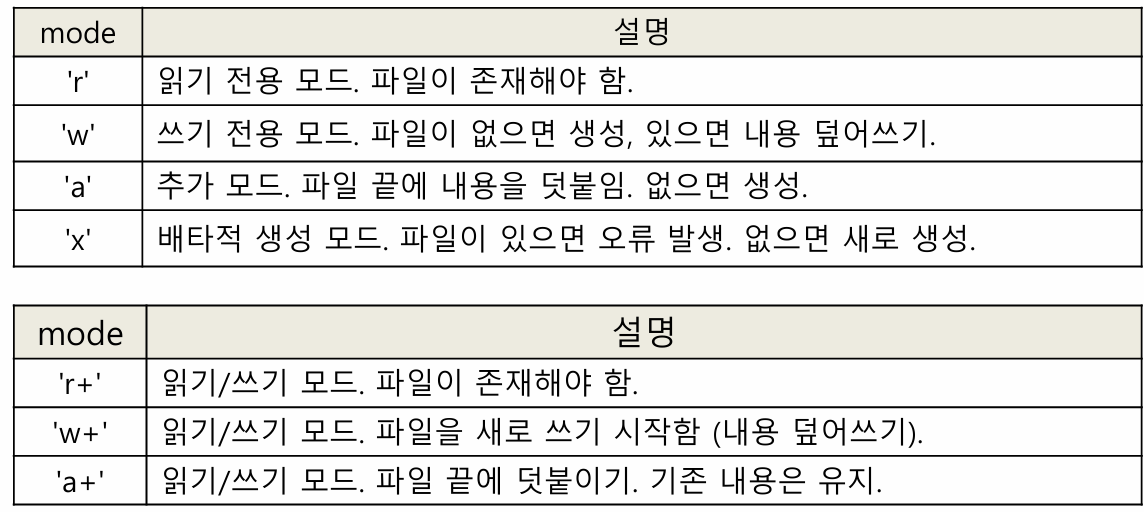

#### 텍스트 파일: 쓰기
현재폴더(실행중인폴더)에phonebook.txt 파일을쓰기모드로열고유니코드의인코딩방식은utf-8 형식으로저장하라

• Utf-8 (Unicode Transfer Format 8-bit)

-가변길이인코딩: 한문자를1~4바이트로표현, ASCII 문자(영문, 숫자등)는1B,한글/한자/특수문자2~4B

-호환성: ASCII와완벽호환(기존시스템과충돌없음)

-범용성: 유니코드기반으로거의모든언어의문자를표현가능

-효율성: 영어중심의문서에서는저장공간을절약할수있음

• write 함수: 여러줄을쓸때, 문자열로출력

• writeline 함수: 한줄씩쓸때

•한줄(line) : 제일끝문자가‘\n’ 으로끝냄

•파일이없으면생성하고, 있으면기존의내용을덮어쓰기하므로주의!!

#### 텍스트 파일: 읽기
현재폴더(실행중인폴더)에유니코드의인코딩방식은utf-8 형식으로저장된phonebook.txt 텍스트파일을읽기모드로열고각라인을출력하라

• Utf-8 (Unicode Transfer Format 8-bit) 형식을디코딩하여유니코드로변환하여읽음

• readlines 함수: 여러줄을읽어리스트로반환(개행문자, ‘\n’, new line 문자를한줄로취급)

• readline 함수: 한줄씩읽어문자열로반환

• str.strip() : 앞뒤의공백문자를제거

•만약파일이없으면예외발생

#### 텍스트 파일: 읽기 예외 처리
현재폴더(실행중인폴더)에유니코드의인코딩방식은utf-8 형식으로저장된phonebook.txt 텍스트파일을읽기모드로열고각라인을출력하라

•만약파일이없으면FileNotFoundError 예외발생

•예외처리해야함

#### 파일 열고쓰고닫기: 한번에하는방법(with ~ as )

In [ ]:
contacts: dict = {'123-456-7890': 'John Doe', '987-654-3210': 'Jane Smith’, \ 
        '555-123-4567' : 'Alice Johnson', '444-987-6543': 'Bob Brown’, \
        '333-222-1111': 'Charlie Davis', '777-888-9999': 'Eve White'}
with open("./phonebook.txt", "w", encoding="utf-8") as wfile:
    for key, value in contacts.items():
        wfile.write(f"{value}, {key}\n")
with open("./phonebook.txt", "r", encoding="utf-8") as rfile:
    line : str = rfile.readline()
    while line:
        key, value = line.strip().split(", ")
        print(f"Name: {key}, Phone: {value}")
        line = rfile.readline() 
        
with open("./phonebook.txt", "r", encoding="utf-8") as rfile:
    for line in rfile:
        key, value = line.strip().split(", ")
        print(f"Name: {key.strip()}, Phone: {value.strip()}")

### 이진 파일 다루기
이진 파일의 열기 모드

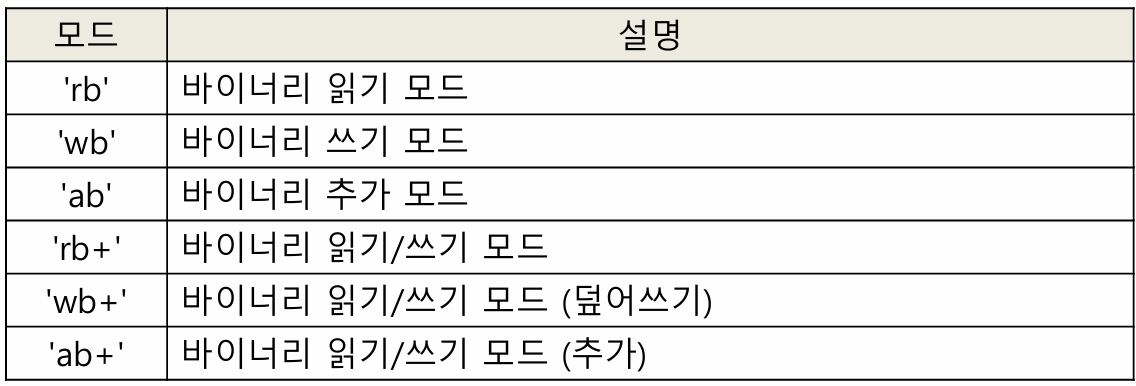

#### 이진 파일의 처리
이미지, 음악, 영상 파일들은텍스트파일이아니어서메모장으로읽을수없음(문자깨짐)

• 해당파일들은특정한인코딩규칙에의해이진으로저장됨

• 따라서특정한디코딩규칙에의해원래데이터로복구해야함

이진파일의읽고쓰기

• r: bytes = f.read(<바이트수>)

• write(<바이트 객체>)

• Type(bytes) : 바이트로 직렬화된 바이트 스트림 객체

유니코드문자열→ 바이트변환

• strb : bytes = str.encode(‘utf-8’) → 한글 1글자에 3바이트, 영문 1글자에 1바이트로 변환

• strb.ljust(bsize, fillchar) → bsize만큼 할당하고 왼쪽 정렬, 나머지는 fillchar 로 채움

• 예) str = ‘한글‘, strb = str.encode(‘utf-8’).ljust(16, b’\x00’) : 16바이트 할당하여 왼쪽정렬, 나머지는 0으로채움

바이트→ 유니코드변환

• Str : str = strb[:16].rstrip(b’\x00’).decode(‘utf-8’), 읽어드린 바이트스트림의 16바이트 끊고 우측 0을 제거한후utf-8로 디코드하여 유니코드얻기

#### 파일의 임의 접근
특정위치(오프셋)로가서데이터를읽거나써야할필요가있을때사용

특히고정길이파일구조의특정레코드를임의로접근

순차적이아닌임의접근하므로 모든레코드가아닌해당레코드만변경가능

함수: f.seek(offset, from)

• offset : 이동할 파일의 위치 (0~n-1, n은 파일 사이즈(Byte))

• From : 0 – 파일 처음부터, 1 – 파일 현재 커서 위치부터,  2 – 파일의 끝부터

• 예( f.seek(10,0) : 처음부터 10의 위치, f.seek(10, 2) : 끝에서 10번째 위치, f.seek(10,1) 현재 위치부터10만큼뒤

• 현재위치(커서위치) : 파일을 읽거나쓸때쓴바이트만큼커서위치가증가

• 오픈했을때커서위치는0

함수: f.tell()

• 열린파일f의파일포인터현재위치를알고싶을때


### F-string(formatted string)
변수나표현식으로내용을변경할수있는포맷문자열f’ {} '

In [ ]:
from datetime import datetime # datetime 모듈에서datetime 클래스만임포트
n = 10
date = datetime(1988, 8, 16, 21, 30)
print(f'{n:|^20}') # '0000000010'
date = datetime(1988, 8, 16, 21, 30)
now = datetime.now()
m = 20000
a = True
print(f’양수부호표시{n:+}') # '10’, 음수는n:
print(f＇날짜{date:%c}') # 'Tue Aug 16 21:30:00 1988'
print(f＇날짜{now:%Y년%m월%d일%H시%M분%S초}') #'2022년08월16일21시30분00초'
print(f'{bool(a) = }') # 'bool(a) = True'
print(f’소수점아래2자리{n:_.2f}’)   # ‘10.00’
print(f’왼쪽정렬{m:<10,}’)    # ‘20,000’
print(f’수식결과{3 + 4 = }') # '3 + 4 = 7'
print(f'우측정렬{m:0>10}') # '0000000010'
print(f'중앙정렬과쉼표표기{m:^20,}') # '    20,000    '
print(f"0으로패딩: '{num:010.2f}'")

#### 날짜와 시간

In [ ]:
# 날짜와시간포맷팅
from datetime import datetime

now = datetime.now()
birthday = datetime(1995, 5, 15, 14, 30, 0)

print(f"현재시간: {now}")
print(f"기본포맷: {now:%Y-%m-%d %H:%M:%S}")
print(f"한국날짜형식: {now:%Y년%m월%d일}")
print(f"시간만: {now:%H:%M:%S}")
print(f"AM/PM 형식: {now:%Y-%m-%d %I:%M:%S %p}")
print(f"요일: {now:%A}")
print(f"월이름: {now:%B}")
print(f"ISO 형식: {now:%Y-%m-%dT%H:%M:%S}")

print(f"\n생일: {birthday:%Y년%m월%d일%H시%M분}")

#### 표현식와 함수 호출

In [ ]:
import math

a = 10
b = 3
name = "python"

# 수학연산
print(f"{a} + {b} = {a + b}")
print(f"{a} - {b} = {a - b}")
print(f"{a} * {b} = {a * b}")
print(f"{a} / {b} = {a / b:.2f}")
print(f"{a} ** {b} = {a ** b}")
print(f"{a} % {b} = {a % b}")

# 함수호출
print(f"sqrt({a}) = {math.sqrt(a):.2f}")
print(f"sin(π/2) = {math.sin(math.pi/2):.2f}")

# 문자열메서드
print(f"대문자: {name.upper()}")
print(f"길이: {len(name)}")
print(f"첫글자: {name[0]}")

# 조건식
score = 85
print(f"성적: {score}점({'합격' if score >= 60 else '불합격'})")

#### 문자열 정렬과 패딩

In [ ]:
text = "Python"
width = 20

print("기본정렬:")
print(f"'{text:<{width}}'") # 왼쪽정렬
print(f"'{text:>{width}}'") # 오른쪽정렬
print(f"'{text:^{width}}'") # 가운데정렬

print("\n특수문자로패딩:")
print(f"'{text:-<{width}}'") # 왼쪽정렬, - 패딩
print(f"'{text:*>{width}}'") # 오른쪽정렬, * 패딩
print(f"'{text:=^{width}}'") # 가운데정렬, = 패딩

print("\n숫자정렬:")
numbers = [1, 22, 333, 4444]
for num in numbers:
    print(f"'{num:>6}'") # 오른쪽정렬, 폭6

print("\n테이블형태:")
data = [
    ("이름", "나이", "점수"),
    ("김철수", 25, 85),
    ("이영희", 30, 92),
    ("박민수", 22, 78)
]

for row in data:
    print(f"{row[0]:<8} {row[1]:>3} {row[2]:>4}")

#### 중괄호 이스케이프와 특수 문자

In [ ]:
name = "Python“ # 중괄호이스케이프와특수문자

print(f"딕셔너리형태: {{'name': '{name}'}}") #중괄호출력하기(이중중괄호사용)
print(f"중괄호출력: {{변수}}")

file_path = r"C:\Users\Python\Documents“ #백슬래시와따옴표
quote = "She said, 'Hello!'"

print(f"파일경로: {file_path}") 
print(f'인용문: {quote}')

# 여러줄f-string
multi_line = f"""
이름: {name}
길이: {len(name)}
대문자: {name.upper()}
"""
print(multi_line)

# repr() 형태로출력(!r 사용)
debug_var = "hello\nworld"
print(f"일반출력: {debug_var}")
print(f"repr 출력: {debug_var!r}")

# 디버깅용출력(Python 3.8+)
x = 10
y = 20
print(f"{x=}, {y=}")
print(f"{x + y=}")